In [26]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import enum
import sys
import bisect
import random
import collections
import os

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator

from read_data import read_data0, read_data1
from plot_data import compute_success_rate, getlabels, plot_file

In [37]:
numTMatrixUpdates = 2
NUM_RUNS = 3
lastT = numTMatrixUpdates - 1
run2plot = [1, 2]
trans2plot = [0,lastT]

# for i in range(2): 
#     for t in range(2):
#         plot_file('../data/medium_cap/raw_medium_cap/run{0:d}'.format(run2plot[i]),
#             tlabelfile="results/run{0:d}_tlabels_T{1:d}".format(run2plot[i],trans2plot[t]),
#             prlabelfile="results/run{0:d}_prmlabels_T{1:d}".format(run2plot[i],trans2plot[t]),
#             tlabelfileTruth='../data/medium_cap/raw_medium_cap/run{0:d}_tlabels'.format(run2plot[i]),
#             prlabelfileTruth='../data/medium_cap/raw_medium_cap/run{0:d}_prmlabels'.format(run2plot[i])
#             )
#         plt.savefig("figures/labelled_run{0:d}_T{1:d}.png".format(run2plot[i],trans2plot[t]),dpi=600)
#         plt.show()

[0. 0.]
run_i[0.96923 0.96667]
run_i[0.76894 0.69318]
[1.73817 1.65985]
avg[0.869085 0.829925]


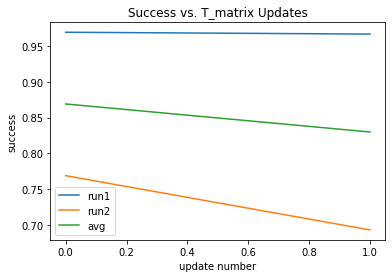

In [38]:
# Plot success_rate vs. #Tmatrix_updates 
#   - legend: average success rate, success run2, success run12
success_a = np.genfromtxt("results/run{0:d}_successRates".format(run2plot[0]),skip_header=1)
success_a = success_a[:,1]
success_b = np.genfromtxt("results/run{0:d}_successRates".format(run2plot[1]),skip_header=1)
success_b = success_b[:,1]
Tupdate = np.arange(0,numTMatrixUpdates,1)

success_sum = np.zeros(numTMatrixUpdates)
success_sum_prev = np.zeros(numTMatrixUpdates)
print(success_sum)
for i in range(1,NUM_RUNS):
    success = np.genfromtxt("results/run{0:d}_successRates".format(i),skip_header=1)
    success = success[:,1]
#     print("run_i"+ str(success))
    success_sum = success_sum + success
print(success_sum)
success_avg = success_sum/(NUM_RUNS-1)
# print("avg"+ str(success_avg)) 

plt.plot(Tupdate, success_a, label = 'run{0:d}'.format(run2plot[0]))
plt.plot(Tupdate, success_b, label = 'run{0:d}'.format(run2plot[1]))
plt.plot(Tupdate, success_avg, label = 'avg')
plt.ylabel('success')
plt.xlabel('update number')
plt.title('Success vs. T_matrix Updates')
plt.legend()
plt.savefig('figures/success_vs_T.png', dpi=600)
plt.show()
plt.close()